# **Convolutional Neural Network with CIFAR10**

**Contents:**
*   Build a CNN
*   Load and prepare a Dataset
*   Training a model
*   Testing a model

In case of implementation doubts, check the PyTorch documentation (https://pytorch.org/docs/stable/nn.html)












# **Implementation**
Let's start by importing the torch libray.

In [1]:
# Library imports
import torch
import torch.nn as nn 
import torch.nn.functional as F

In [11]:
# CNN
# Let's build the CNN model

class nnModel(nn.Module):
  def __init__(self, number_of_classes=1):
    super(nnModel, self).__init__() # NN Module Initialization
    # 1st Convolutional layer
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
    self.batch1 =nn.BatchNorm2d(16)
    # 2nd Convolutional layer
    self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
    self.batch2 =nn.BatchNorm2d(32)
    # 3rd Convolutional layer
    self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
    self.batch3 =nn.BatchNorm2d(64)
    # 4th Convolutional layer
    self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
    self.batch4 =nn.BatchNorm2d(128)
    # 5th Convolutional layer
    self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
    self.batch5 =nn.BatchNorm2d(256)

    # Pool Layer
    self.pool=nn.MaxPool2d(2,2)

    # 1st Fully Connected layer (Linear layer)
    self.fc1 = nn.Linear(in_features=256*8*8, out_features=256)
    # 2nd Fully Connected layer (Linear layer)
    self.fc2 = nn.Linear(in_features=256, out_features=128) # Last layer's output must be the same as the number of classes/categories
    # 3rd Fully Connected layer (Linear layer)
    self.fc3 = nn.Linear(in_features=128, out_features=64) # Last layer's output must be the same as the number of classes/categories
    # 4th Fully Connected layer (Linear layer)
    self.fc4 = nn.Linear(in_features=64, out_features=10) # Last layer's output must be the same as the number of classes/categories 

    # Dropout
    self.dropoutF = nn.Dropout(p=0.25)

  def forward(self, x):
    # In "forward" function, we define the behaviour of the CNN
    # Activation functions are also implemented in "forward" function
    # 1st Convolutional layer
    x = F.elu(self.conv1(x))
    x = F.elu(self.batch1(x))
    # 2nd Convolutional layer
    x = self.pool(F.elu(self.conv2(x)))
    x = F.elu(self.batch2(x))
    # 3rd Convolutional layer
    x = F.elu(self.conv3(x))
    x = F.elu(self.batch3(x))
    # 4th Convolutional layer
    x = self.pool(F.elu(self.conv4(x)))
    x = F.elu(self.batch4(x))
    # 5th Convolutional layer
    x = F.elu(self.conv5(x))
    #x = self.dropout(x)
    x = F.elu(self.batch5(x))
    

    # Before passing features to the linear layers, we need to "flatten" the features.
    flat_x = x.view(x.shape[0], -1)

    # 1st Fully Connected layer (Linear layer)
    flat_x = F.elu(self.fc1(flat_x))
    flat_x = self.dropoutF(flat_x) 
    flat_x = F.elu(self.fc2(flat_x))
    flat_x = F.elu(self.fc3(flat_x))
    
    # 2nd Fully Connected layer (Linear layer)
    flat_x = self.fc4(flat_x) # Usually, last layer does not need activation layer

    return flat_x




In [12]:
# Check the built CNN model
cnn_model = nnModel(10)
print("CNN Architecture: "+ str(cnn_model))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
print('\nThe model will run on', device)
cnn_model = cnn_model.to(device)

# Using the torchsummary, we can check your network in more detail
import torchsummary
print("\n\n")
torchsummary.summary(cnn_model, input_size = (3, 32, 32), batch_size = 6) 



CNN Architecture: nnModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batch5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=16384, out_

## **Dataset**

In [4]:
# Library imports
import numpy as np 
from torch.utils.data.sampler import SubsetRandomSampler # Sampler 
from torchvision . datasets import CIFAR10
import torchvision . transforms as tt

In [5]:
# Download the dataset online available on PyTorch 
#transform = tt.Compose([tt.AutoAugment(policy=tt.AutoAugmentPolicy.CIFAR10),tt.ToTensor()])
transform_train=tt.Compose([
        tt.RandomHorizontalFlip(),
        tt.ToTensor(),
        tt.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 

transform_test=tt.Compose([
        tt.ToTensor(),
        tt.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 
training_data = CIFAR10(download =True,root="./data",transform=transform_train)
testing_data = CIFAR10(root ="./data",train=False, transform=transform_test)

# Dataset is already divided in training and testing. 
# However, to analize the model over the training step, and also perform cross-validation, the training set must be divided in two parts:
#   Training Set (80%)
#   Validation Set (20%)

# Lets start to obtain training indices
num_train = len(training_data)
print("Number of images in original training set: " + str(num_train)) # 60 000
indices = list(range(num_train))

# Randomly Shuffle
np.random.shuffle(indices)

# Split 80%/20%
split = int(np.floor(num_train * 0.2)) # 12 000
print("Split Number: " + str(split))
training_idx, valid_idx = indices[split:], indices[:split] # 48 000 / 12 000
print("Number of training images: " + str(len(training_idx)))
print("Number of validation images: " + str(len(valid_idx)))

# Lets also see how many images are on testing set
print("Number of images in the testing set: " + str(len(testing_data))) # 10 000

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Number of images in original training set: 50000
Split Number: 10000
Number of training images: 40000
Number of validation images: 10000
Number of images in the testing set: 10000


In [6]:
# To train the network, we must "encode" the data into a PyTorch dataloader
# Since we divided the original training set in 2, now we need to assign the indices to the samples
training_sampler = SubsetRandomSampler(training_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

batch_size = 16 # 16 images per batch

# Training Set
training_loader = torch.utils.data.DataLoader(dataset = training_data, \
                                              batch_size = batch_size, \
                                              sampler = training_sampler)

# Validation Set
valid_loader = torch.utils.data.DataLoader(dataset = training_data, \
                                           batch_size = batch_size, \
                                           sampler = valid_sampler)

# Testing Set
# Here, we do not need the "sampler" input, since we did not change the original testing set
testing_loader = torch.utils.data.DataLoader(dataset = testing_data, \
                                           batch_size = batch_size, \
                                           shuffle = True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

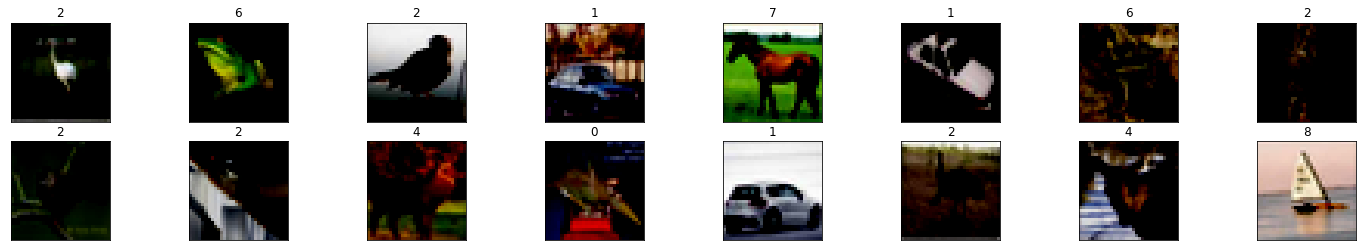

In [7]:
# Visualization of a whole batch
import matplotlib.pyplot as plt

# Get images
dataiter = iter(training_loader)
images, labels = dataiter.next() # Get the images and their labels

# Plot the whole batch 
fig = plt.figure(figsize=(25, 4))
# Loop over all the images in the batch(16)
for idx in np.arange(batch_size):
    # Add a subplot for the image 
    ax = fig.add_subplot(2, batch_size/2, idx+1, xticks=[], yticks=[])
    # Subplot with the image 
    ax.imshow(np.transpose(images[idx],(1,2,0)))
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

## **Training**

**Steps before training the CNN:**

*   Define the loss function
*   Define the optimization/propagation algorithm
*   Define the hyper-parameter values (e.g., learning rate, epochs, batch size)
*   Define the evaluation metrics to assess performance in the training dataset

The loss plays an important role in assessing the performance of the CNN model. By analyzing the loss,the model can be said to be learning correctly, to be overfitting or to be underfitting. 





In [8]:
# Library imports
import torch.optim as optim

[1,  1000] loss: 1.395
[1,  2000] loss: 2.449
(Validation Set) Epoch: 1 Loss: 0.060020425713062285 Acc: 66.39
[2,  1000] loss: 0.867
[2,  2000] loss: 1.699
(Validation Set) Epoch: 2 Loss: 0.049134350594878196 Acc: 73.18
[3,  1000] loss: 0.743
[3,  2000] loss: 1.477
(Validation Set) Epoch: 3 Loss: 0.04545532489195466 Acc: 74.62
[4,  1000] loss: 0.667
[4,  2000] loss: 1.331
(Validation Set) Epoch: 4 Loss: 0.04219736013934016 Acc: 76.28
[5,  1000] loss: 0.600
[5,  2000] loss: 1.199
(Validation Set) Epoch: 5 Loss: 0.038992866049706934 Acc: 78.74
[6,  1000] loss: 0.533
[6,  2000] loss: 1.091
(Validation Set) Epoch: 6 Loss: 0.03689354224205017 Acc: 79.96
[7,  1000] loss: 0.494
[7,  2000] loss: 1.007
(Validation Set) Epoch: 7 Loss: 0.03461305369362235 Acc: 80.65
[8,  1000] loss: 0.454
[8,  2000] loss: 0.911
(Validation Set) Epoch: 8 Loss: 0.03437566079646349 Acc: 81.5
[9,  1000] loss: 0.352
[9,  2000] loss: 0.693
(Validation Set) Epoch: 9 Loss: 0.028761304351501166 Acc: 84.16
[10,  1000] loss

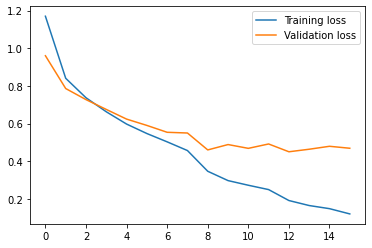

In [13]:
# To train a CNN, we must choose (or develop) a loss function, an optimizer algorithm, and a set of hyper-parameters (learning rate, number of epochs, etc)
# Hyper-parameters
lr = 0.001
num_epochs = 16
training_loss=[]

validation_loss=[]
val_loss=0.0
plot_valid_loss=[]

# Loss Function
criterion = nn.CrossEntropyLoss() # Cross entropy loss function is widely used in classification problems
# Optimizer Algorithm
optimizer = optim.Adamax(cnn_model.parameters(), lr = lr,weight_decay=0.001)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[8,12,15], gamma=0.5)
# Training
running_loss = 0.0

for epoch in range(num_epochs):
  running_loss = 0.0
  for batch_id, data in enumerate(training_loader, 0):
    # Get the images and their labels
    images, labels = data
    # Send the images and their labels to the training device
    images, labels = images.to(device), labels.to(device)

    # Pass images through the CNN
    outputs = cnn_model(images)

    # Create a loss value
    loss = criterion(outputs, labels)
    

    # Backpropagation
    optimizer.zero_grad() # zero the parameter gradients
    loss.backward()
    optimizer.step()

    # Check some statistics
    running_loss += loss.item()
    if batch_id % 1000 == 999: # prints every 1000 batchs
      print('[%d, %5d] loss: %.3f' % (epoch + 1, batch_id + 1, running_loss / 1000))

  train_loss=running_loss / len(training_loader)
  training_loss.append(train_loss)
  scheduler.step()
  # For each epoch, analize the model performance
  valid_correct = 0
  valid_total = 0
  valid_total_loss = 0
  with torch.no_grad(): # In this part, we will not train, so we don't need to calculate gradients
    for valid_batch_id, valid_data in enumerate(valid_loader, 0):
      valid_images, valid_labels = valid_data
      valid_images, valid_labels = valid_images.to(device), valid_labels.to(device)
      valid_outputs = cnn_model(valid_images)
      valid_loss = criterion(valid_outputs, valid_labels)
      validation_loss.append(valid_loss.item())
      valid_total_loss += valid_loss.item()
      _, valid_predicted = torch.max(valid_outputs.data, 1)
      valid_total += valid_labels.size(0)
      valid_correct += (valid_predicted == valid_labels).sum().item()
    
  val_loss=valid_total_loss/len(valid_loader)
  plot_valid_loss.append(val_loss)
  print("(Validation Set) Epoch: " + str(epoch + 1) + " Loss: " + str(valid_total_loss/ len(valid_idx)) + " Acc: " + str(100*valid_correct/valid_total))

print("Training is completed!")

plt.plot(training_loss,label='Training loss')
plt.plot(plot_valid_loss,label='Validation loss')
plt.legend()
plt.show()


## **Testing**

**Steps after training the CNN:**
*     Define the evaluation metrics to assess performance in the testing dataset:
    1. Accuracy - number of correct predictions divided by the total number of predictions
    2. Confusion Matrix - summary of prediction results per class. Provides insights about the errors and types of errors being made by the classifier. Can be computed using confusion_matrix from sklearn.metrics (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix). The inputs of the confusion_matrix are the ground truth (correct) target values, the estimated targets as returned by the classifier and the unique class labels defined in the dataset (MNIST - 0,1,2,3,4,5,6,7,8,9).

Note:
It is important to guarantee that data operations are performed on the same device, in most cases, data must be transfered from the device to the cpu() before computing metrics.


In [14]:
from sklearn.metrics import confusion_matrix

# Evaluate a CNN is similar to the training process without the backpropagation.
# To evaluate a CNN, we need to follow the evaluation metrics
num_classes = 10
correct = 0
total = 0
BAcc=0
class_correct = list(0. for i in range(num_classes))
class_total = list(0. for i in range(num_classes))
conf_matrix =[[0 for x in range(num_classes)] for y in range(num_classes)]

cnn_model.eval()

with torch.no_grad(): # we are not training, so we don't need to calculate gradients
  for batch_id, data in enumerate(testing_loader, 0):
    # Get the images and their labels
    images, labels = data
    # Send the images and their labels to the training device
    images, labels = images.to(device), labels.to(device)

    # Calculate the CNN's predictions by running images through the network
    outputs = cnn_model(images)

    # The class with the highest
    _, predicted = torch.max(outputs.data, 1)

    # Get model's performance
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    c = (predicted == labels).squeeze()

    for i in range(len(images)):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1
    
    conf_matrix+=confusion_matrix(predicted.cpu(), labels.cpu(),labels=[x for x in range( num_classes )])


FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)  
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)

F1=TP/(TP+((1/2)*(FP+FN)))
TP_t = sum(TP)
FP_t = sum(FP)
TN_t = sum(TN)
FN_t = sum(FN)

F1_t=TP_t/(TP_t+((1/2)*(FP_t+FN_t)))
# Performance per Class
for i in range(num_classes):
  if class_total[i] == 0:
    print('Accuracy of %2s : %2d %% in %d Images' % (i+1, 0, 0))
  else:
    print('Accuracy of %2s : %2d %% in %d Images' % (i+1, 100 * class_correct[i] / class_total[i], class_total[i]))
    print('F1 score of %2s : %2d %% in %d Images' % (i+1, 100 * F1[i], class_total[i]))
    BAcc += class_correct[i] / class_total[i]

BAcc=BAcc/10

# Show model's performance
print("\n")
print('Accuracy using {} test images: {} %\n'.format(total,100 * correct / total))
print('F1 score using {} test images: {} %\n'.format(total,100 * F1_t))
print('Balanced accuracy using {} test images: {} %\n'.format(total,100*BAcc))

# Confusion Matrix
print('Confusion Matrix')
print(conf_matrix)


Accuracy of  1 : 89 % in 1000 Images
F1 score of  1 : 86 % in 1000 Images
Accuracy of  2 : 94 % in 1000 Images
F1 score of  2 : 94 % in 1000 Images
Accuracy of  3 : 79 % in 1000 Images
F1 score of  3 : 81 % in 1000 Images
Accuracy of  4 : 76 % in 1000 Images
F1 score of  4 : 72 % in 1000 Images
Accuracy of  5 : 85 % in 1000 Images
F1 score of  5 : 84 % in 1000 Images
Accuracy of  6 : 74 % in 1000 Images
F1 score of  6 : 79 % in 1000 Images
Accuracy of  7 : 90 % in 1000 Images
F1 score of  7 : 88 % in 1000 Images
Accuracy of  8 : 88 % in 1000 Images
F1 score of  8 : 89 % in 1000 Images
Accuracy of  9 : 92 % in 1000 Images
F1 score of  9 : 92 % in 1000 Images
Accuracy of 10 : 89 % in 1000 Images
F1 score of 10 : 92 % in 1000 Images


Accuracy using 10000 test images: 86.12 %

F1 score using 10000 test images: 86.11999999999999 %

Balanced accuracy using 10000 test images: 86.11999999999999 %

Confusion Matrix
[[899   9  47  13  15   9   7   7  47  29]
 [  6 944   2   3   1   1   3   0  1